In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import mean_squared_error


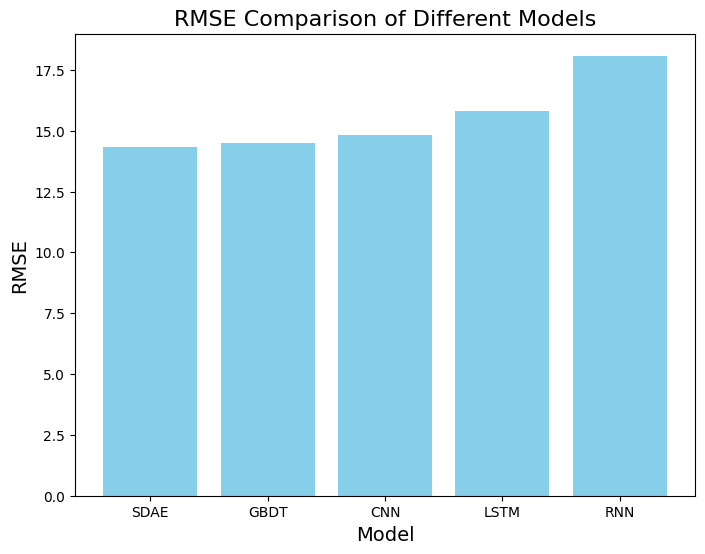

In [41]:
# model names and their corresponding RMSE values
models = ['GBDT', 'CNN', 'LSTM', 'SDAE', 'RNN']
rmse_values = [14.488147304127896, 14.805909461321166, 15.824401957347124, 14.343229918636734, 18.07896962019336]

# sort models and RMSE values in ascending order of RMSE
sorted_models_rmse = sorted(zip(rmse_values, models))
sorted_rmse_values, sorted_models = zip(*sorted_models_rmse)

plt.figure(figsize=(8, 6))
plt.bar(sorted_models, sorted_rmse_values, color='skyblue')

plt.title('RMSE Comparison of Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

plt.show()


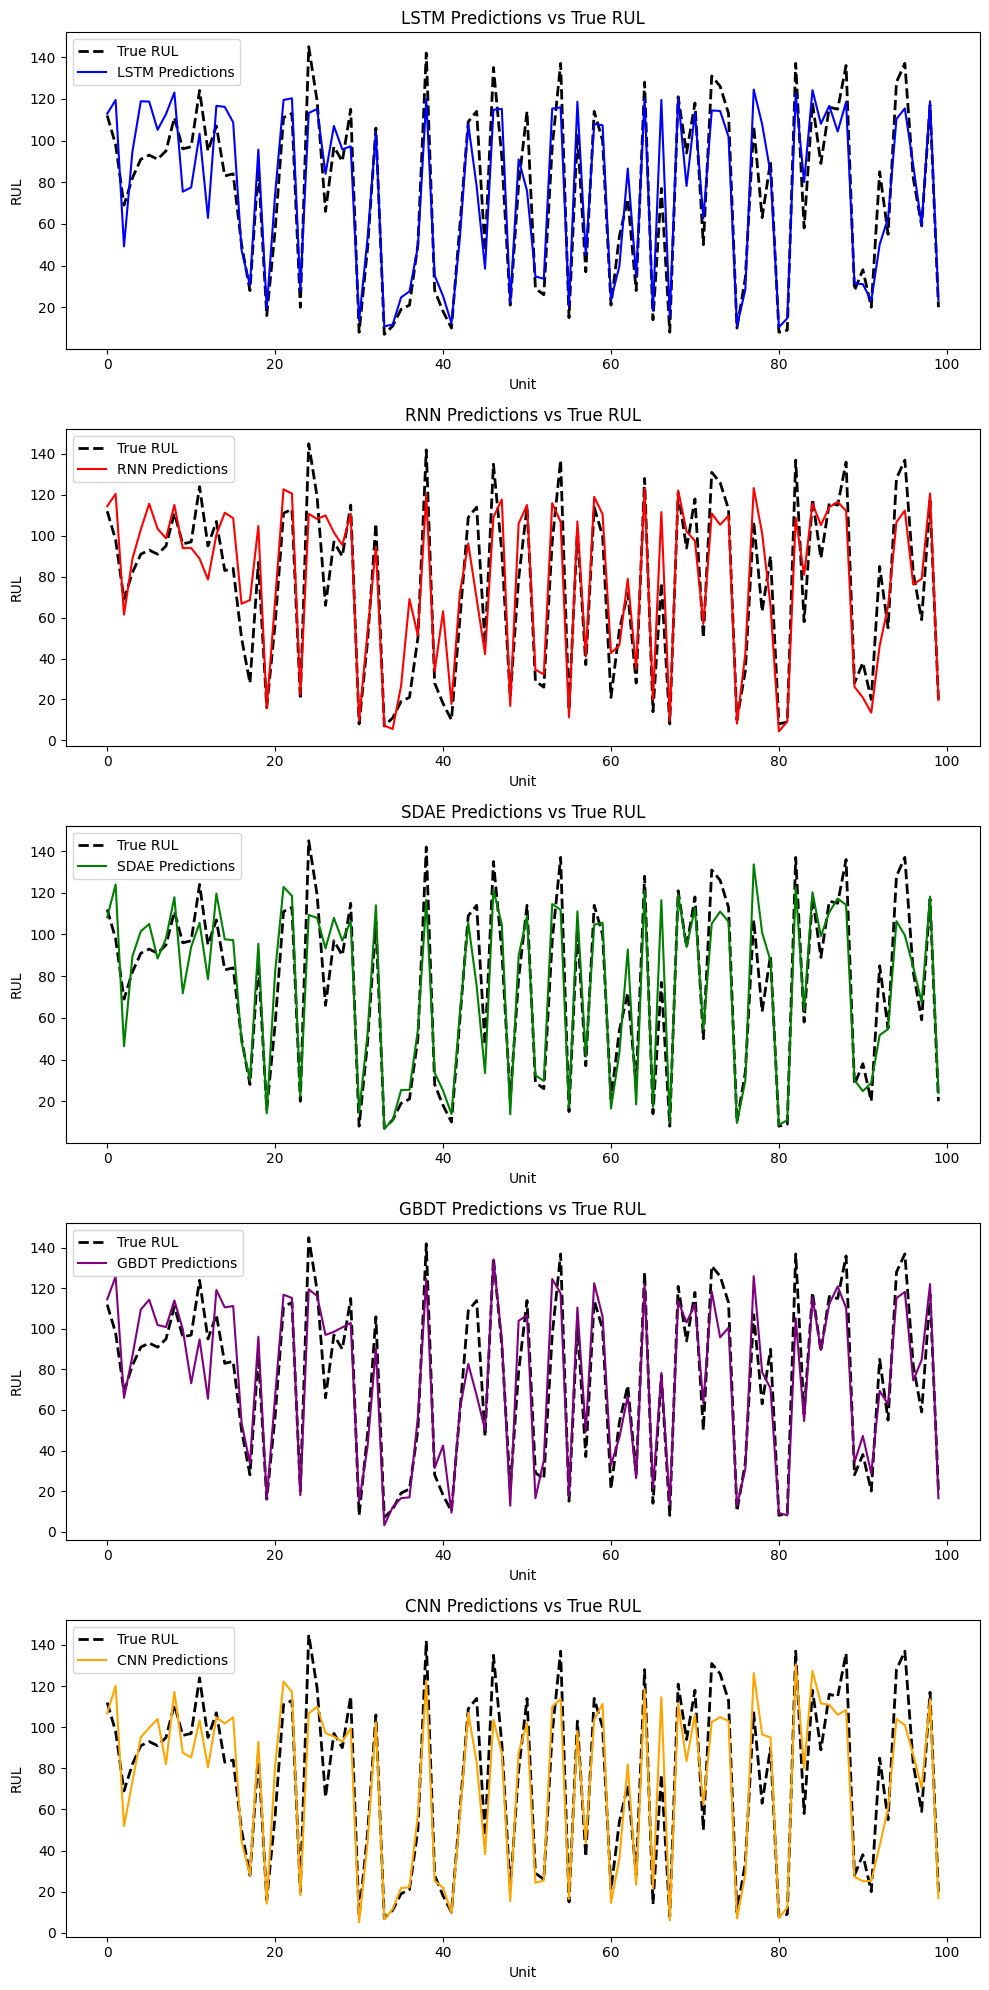

In [42]:
# load the .npy files into arrays
lstm_predictions = np.load('lstm_predictions.npy')
rnn_predictions = np.load('rnn_predictions.npy')
sdae_predictions = np.load('sdae_predictions.npy')
gbdt_predictions = np.load('GBDT_model_trained_test_predictions.npy')
cnn_predictions = np.load('CNN_model_trained_test_predictions.npy')

# load the true RUL from the pickle file
folder_path = '../data/batched_data_pickle_files/true_rul.pkl'
with open(folder_path, 'rb') as file:
    true_rul = pickle.load(file)

true_rul = np.array(true_rul)

# ceate subplots (5 rows, 1 column)
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

# plot each prediction vs true RUL on individual subplots
axes[0].plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=2)
axes[0].plot(lstm_predictions, label='LSTM Predictions', color='blue')
axes[0].set_title('LSTM Predictions vs True RUL')
axes[0].set_ylabel('RUL')
axes[0].set_xlabel('Unit') 
axes[0].legend()

axes[1].plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=2)
axes[1].plot(rnn_predictions, label='RNN Predictions', color='red')
axes[1].set_title('RNN Predictions vs True RUL')
axes[1].set_ylabel('RUL')
axes[1].set_xlabel('Unit')  
axes[1].legend()

axes[2].plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=2)
axes[2].plot(sdae_predictions, label='SDAE Predictions', color='green')
axes[2].set_title('SDAE Predictions vs True RUL')
axes[2].set_ylabel('RUL')
axes[2].set_xlabel('Unit')  
axes[2].legend()

axes[3].plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=2)
axes[3].plot(gbdt_predictions, label='GBDT Predictions', color='purple')
axes[3].set_title('GBDT Predictions vs True RUL')
axes[3].set_ylabel('RUL')
axes[3].set_xlabel('Unit')  
axes[3].legend()

axes[4].plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=2)
axes[4].plot(cnn_predictions, label='CNN Predictions', color='orange')
axes[4].set_title('CNN Predictions vs True RUL')
axes[4].set_ylabel('RUL')
axes[4].set_xlabel('Unit')  
axes[4].legend()

plt.tight_layout()  
plt.show()


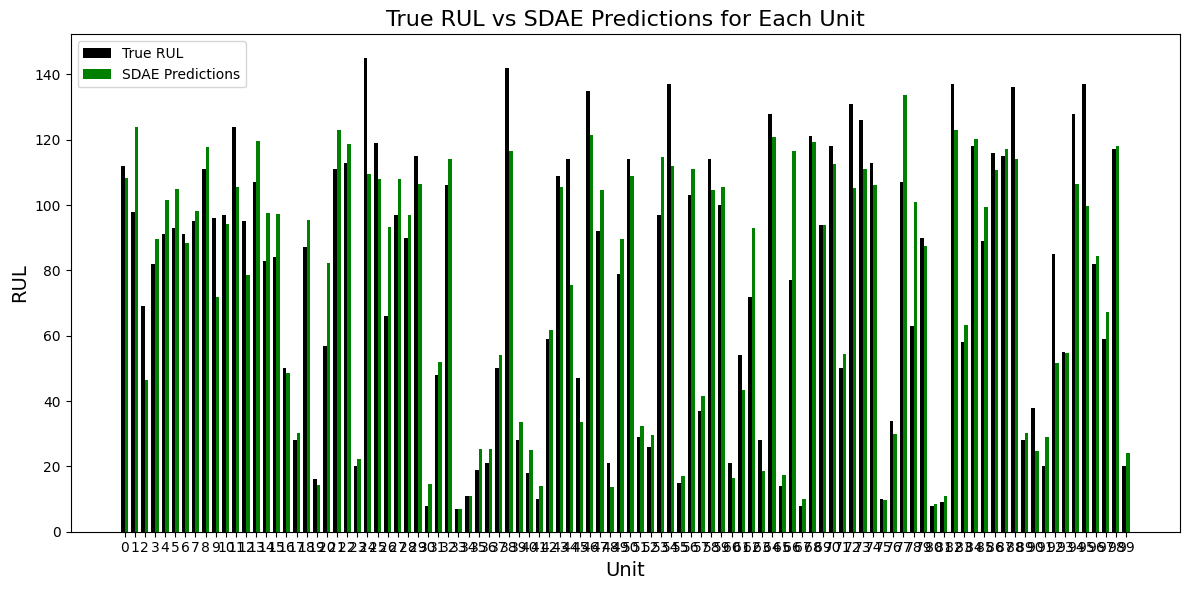

In [43]:
# load the .npy file for SDAE predictions
sdae_predictions = np.load('sdae_predictions.npy')

# load the true RUL from the pickle file
folder_path = '../data/batched_data_pickle_files/true_rul.pkl'
with open(folder_path, 'rb') as file:
    true_rul = pickle.load(file)

# ensure that the true RUL data is in a numpy array format
true_rul = np.array(true_rul)

# number of units
num_units = len(true_rul)

# set the positions of the bars on the x-axis
indices = np.arange(num_units)

# set the width of the bars
bar_width = 0.35

# create the bar chart
plt.figure(figsize=(12, 6))

# plot the bars for true RUL and SDAE predictions
plt.bar(indices, true_rul, bar_width, label='True RUL', color='black')
plt.bar(indices + bar_width, sdae_predictions, bar_width, label='SDAE Predictions', color='green')

plt.title('True RUL vs SDAE Predictions for Each Unit', fontsize=16)
plt.xlabel('Unit', fontsize=14)
plt.ylabel('RUL', fontsize=14)

plt.legend()

plt.xticks(indices + bar_width / 2, indices)

plt.tight_layout()

plt.show()


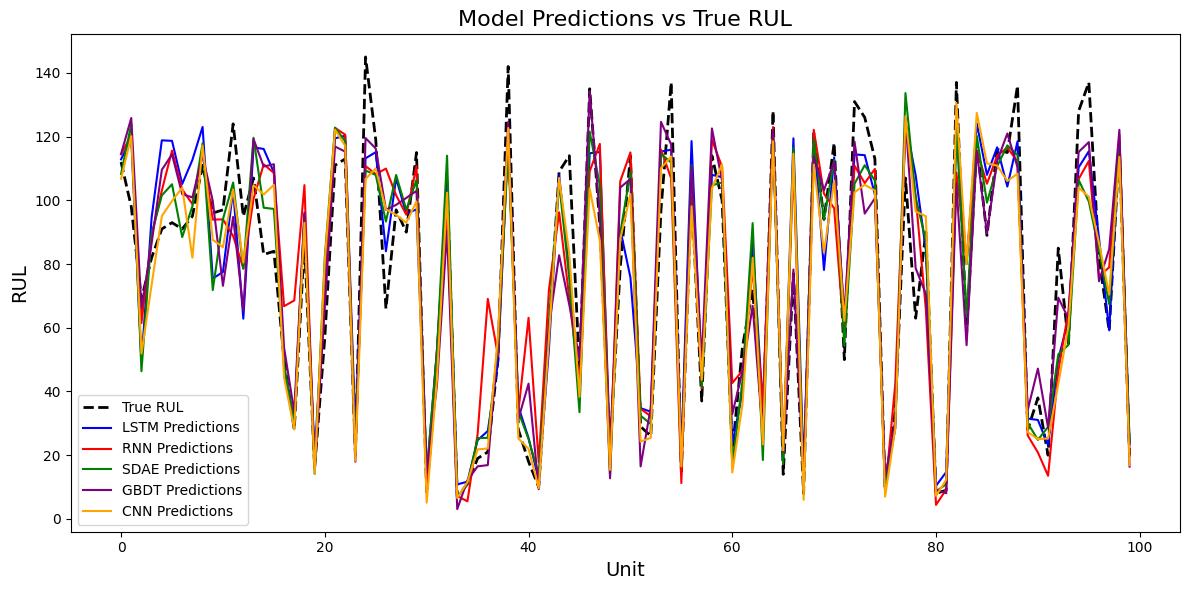

In [44]:
plt.figure(figsize=(12, 6))

# plot true RUL and model predictions
plt.plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=2)
plt.plot(lstm_predictions, label='LSTM Predictions', color='blue')
plt.plot(rnn_predictions, label='RNN Predictions', color='red')
plt.plot(sdae_predictions, label='SDAE Predictions', color='green')
plt.plot(gbdt_predictions, label='GBDT Predictions', color='purple')
plt.plot(cnn_predictions, label='CNN Predictions', color='orange')

plt.title('Model Predictions vs True RUL', fontsize=16)
plt.xlabel('Unit', fontsize=14)
plt.ylabel('RUL', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


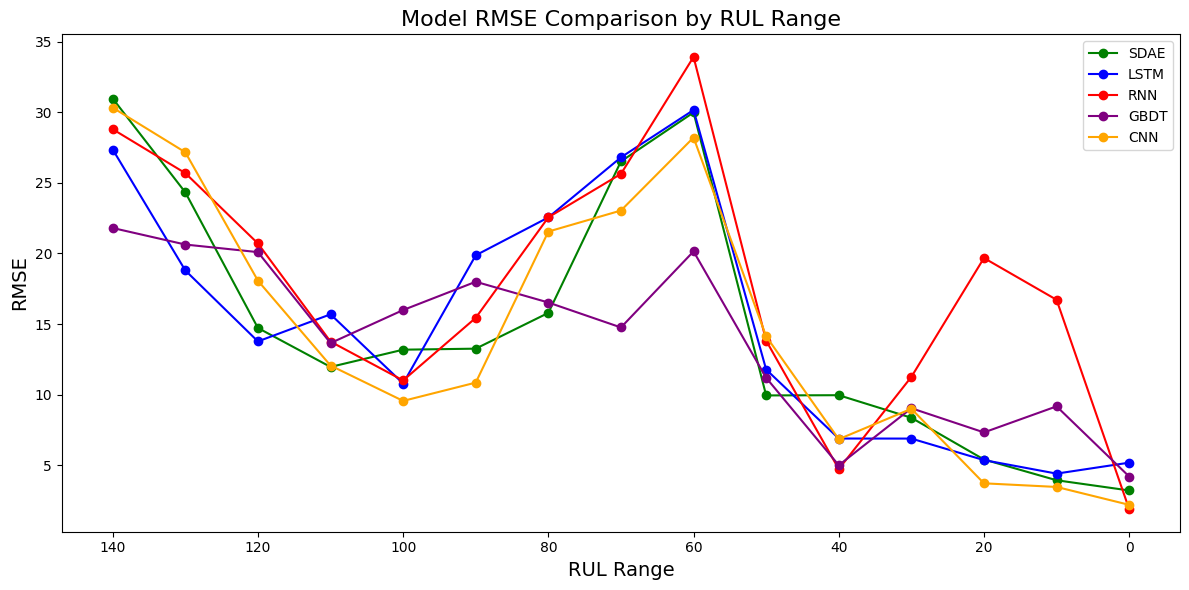

In [45]:
# load the .npy file for SDAE predictions (replace with your actual paths)
sdae_predictions = np.load('sdae_predictions.npy')
lstm_predictions = np.load('lstm_predictions.npy')
rnn_predictions = np.load('rnn_predictions.npy')
gbdt_predictions = np.load('GBDT_model_trained_test_predictions.npy')
cnn_predictions = np.load('CNN_model_trained_test_predictions.npy')

# load the true RUL from the pickle file
folder_path = '../data/batched_data_pickle_files/true_rul.pkl'
with open(folder_path, 'rb') as file:
    true_rul = pickle.load(file)

# ensure the true RUL data is in numpy array format
true_rul = np.array(true_rul)

# define the RUL intervals (e.g., 0-10, 10-20, etc)
rul_intervals = np.arange(0, np.max(true_rul) + 10, 10)  # create intervals of size 10

# function to compute RMSE for each model in a given RUL interval
def compute_rmse_for_intervals(true_rul, predictions, intervals):
    rmse_values = []
    for i in range(len(intervals) - 1):
        # Select the indices for the current interval
        interval_mask = (true_rul >= intervals[i]) & (true_rul < intervals[i+1])
        
        # Get the true RUL and predictions for this interval
        interval_true_rul = true_rul[interval_mask]
        interval_predictions = predictions[interval_mask]
        
        # Calculate RMSE for this interval
        rmse = np.sqrt(mean_squared_error(interval_true_rul, interval_predictions))
        rmse_values.append(rmse)
    
    return rmse_values

# calculate RMSE for each model in each RUL interval
sdae_rmse = compute_rmse_for_intervals(true_rul, sdae_predictions, rul_intervals)
lstm_rmse = compute_rmse_for_intervals(true_rul, lstm_predictions, rul_intervals)
rnn_rmse = compute_rmse_for_intervals(true_rul, rnn_predictions, rul_intervals)
gbdt_rmse = compute_rmse_for_intervals(true_rul, gbdt_predictions, rul_intervals)
cnn_rmse = compute_rmse_for_intervals(true_rul, cnn_predictions, rul_intervals)

# plot the RMSE for each model in each RUL interval
plt.figure(figsize=(12, 6))

# plot RMSE for each model
plt.plot(rul_intervals[:-1], sdae_rmse, label='SDAE', marker='o', linestyle='-', color='green')
plt.plot(rul_intervals[:-1], lstm_rmse, label='LSTM', marker='o', linestyle='-', color='blue')
plt.plot(rul_intervals[:-1], rnn_rmse, label='RNN', marker='o', linestyle='-', color='red')
plt.plot(rul_intervals[:-1], gbdt_rmse, label='GBDT', marker='o', linestyle='-', color='purple')
plt.plot(rul_intervals[:-1], cnn_rmse, label='CNN', marker='o', linestyle='-', color='orange')

plt.title('Model RMSE Comparison by RUL Range', fontsize=16)
plt.xlabel('RUL Range', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend()

# invert the x-axis to show higher RUL values on the left
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()
